# Going Deeper - The mechanism of pytorch
- Working with pytorch computation graphs
- Working with pytorch tensor objects
- Solving the classic XOR problem and understanding model capacity
- Building compolex nn models using Sequential class and the nn.Module class
- Comupting gradients using automatic differentiation and torch.autograd

## PyTorch's computation graphs

In [2]:
# Creating a graph in pytorch
import torch
def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z

In [3]:
print('Scalar inputs: ', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))
print('Rank 1 inputs: ', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('Rank 2 inputs: ', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Scalar inputs:  tensor(1)
Rank 1 inputs:  tensor([1])
Rank 2 inputs:  tensor([[1]])


## Pytorch tensor objects for string and updating model parameters
- Initialize with requires_grad=True
- Only tensors of floating point and complex dtype can require gradients
- requires_grad=False by default, but can be set by requires_grad_()

In [4]:
# Generate tensor objects of type float32
a = torch.tensor(3.14, requires_grad=True)
print(a)
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(b)

tensor(3.1400, requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


In [5]:
# Set requires_grad
w = torch.tensor([1.0, 2.0, 3.0])
print(w.requires_grad)
w.requires_grad_()
print(w.requires_grad)

False
True


In [8]:
import torch.nn as nn
torch.manual_seed(1)
w = torch.empty((2, 3))
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [9]:
# Define two Tensor objects inside the base nn.Module class
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty((2, 3), requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w1 = torch.empty((1, 2), requires_grad=True)
        nn.init.xavier_normal_(self.w2)

### Computing gradients via automatic differentiation

In [11]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)
x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w, x), b)
# loss = (y - z).pow(2).sum()
loss = torch.sum(torch.pow((y-z), 2))
loss.backward()
print('dL/dw: ', w.grad)
print('dL/db: ', b.grad)

dL/dw:  tensor(-0.5600)
dL/db:  tensor(-0.4000)


### Implementing models based on nn.Sequential

In [12]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [ ]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

### Build an NN for XOR classification task

/var/folders/pg/qydlmtzs3bx2sy9z5fgl3s1r0000gn/T/ipykernel_57151/1802724706.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  x_test = torch.tensor([x[n_train:, :]], dtype=torch.float32)


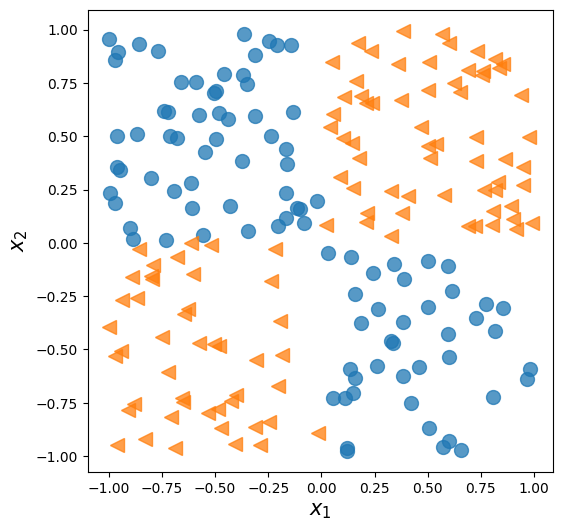

In [13]:
# Generate 200 samples from uniform dist. x_i = U([-1.0, 1.0]), y = 1 iff x_1 * x_2 < 0.
# 100 training + 100 testing
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
x_test = torch.tensor([x[n_train:, :]], dtype=torch.float32)
y_train = torch.tensor([y[:n_train]], dtype=torch.float32)
y_test = torch.tensor([y[n_train:]], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()